In [1]:
import cv2
import mediapipe as mp
import os
import numpy as np
from scipy.spatial import distance

from tensorflow import keras


modelo_prd = keras.models.load_model('Modelo//Modelo_prd.h5')
clases = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
font = cv2.FONT_HERSHEY_SIMPLEX
#new_predictions = new_model.predict(test_feat)
#letra = np.argmax(new_predictions)
#print('Modelo 1: Letra indicada por el modelo: ',nombres_clases[letra],'Probabilidad',new_predictions[0][letra])

mp_drawing = mp.solutions.drawing_utils # Plantilla de Dibujo de Mediapipe
mp_hands = mp.solutions.hands
mp_drawing_styles = mp.solutions.drawing_styles

cap = cv2.VideoCapture(0, cv2.CAP_DSHOW) # Leer el video
i=0

with mp_hands.Hands( # Se especifica que se van a tomar las dos manos
    static_image_mode=False,
    max_num_hands=2,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
    
    while True: # Se realiza la activación de detección de la camara
        ret, frame = cap.read()
        if ret == False:
            break
        
        #copia = frame.copy()
        posiciones = [] # Lista donde se van a almacenar las coordenadas de los puntos
        height, width, c = frame.shape # Tamaño del frame        
        frame = cv2.flip(frame, 1)   
        copia = frame.copy() ###Se genera copia del fram antes de dibujar lo puntos        
        cv2.imshow('Original',copia)        
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        #frame.flags.writeable = False
        results = hands.process(frame_rgb) # Resultado de las manos                   
        if results.multi_hand_landmarks: # Coordenadas de puntos de las manos
            for mano in results.multi_hand_landmarks:
                for id, ln in enumerate(mano.landmark): # Información de la mano con el ID
                
                    corx, cory = int(ln.x*width), int(ln.y*height)
                    posiciones.append([id,corx,cory])
                    mp_drawing.draw_landmarks(
                    frame, mano, mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(0,100,100), thickness=1, circle_radius=5),
                    mp_drawing.DrawingSpec(color=(100,0,100), thickness=1, circle_radius=5))
                
                    ############# DIFERENCIANDO DEDOS #################
        
                    #mp_drawing_styles.get_default_hand_landmarks_style(),
                    #mp_drawing_styles.get_default_hand_connections_style()) 
                    
                if len (posiciones) !=0:
                    centro = posiciones[9] # Punto central de la mano
                    #print('centro',centro)
                    longitud = 100
                    error = 0#15
                    x1, y1 = (centro[1] - longitud),(centro[2] + longitud+error) # Se Restan 100 en los dos ejes
                    ancho, alto = (x1+120), (y1+150) # Se suma 120 en ancho y 150 en alto
                    ##x2, y2 = x1 + ancho, y1 + alto 
                    x2, y2 = (centro[1] + longitud),(centro[2] - (longitud+10)) # Se Restan 100 en los dos ejes                    
                    ###Validar si el dedo corazon esta dentro del recuadro
                    corazon = posiciones[12]
                    pulgar = posiciones[4]
                    if (corazon[2] - y2) - error > 0:                        
                        frame[:y2,:] =0
                        reg = copia[y1:y2, x1:x2]                    
                        #print('pulgar',pulgar[1],x1)
                        if pulgar[1] - x1  > 0:                            
                            frame[:,:x1] =0
                            frame[y1:,:] =0
                            frame[:,x2:] =0
                            region = copia[y2:y1,x1:x2]                            
                            #cv2.imwrite('img//letras'+str(i)+'.jpg',region) ###Guardar imagen region
                            region_resize = cv2.resize(region, dsize=(200, 200), interpolation=cv2.INTER_CUBIC)
                            region_norm = (region_resize-region_resize.min())/(region_resize.max()-region_resize.min())
                            sing_to_pred = region_norm[None,:,:]                                                        
                            print('original',np.min(region_resize), np.min(region_norm),'max',
                                 np.max(region_resize), np.max(region_norm))                    
                            cv2.imshow('Region',region_resize) # Muestra la región de la mano                        
                            predictions = modelo_prd.predict(sing_to_pred)
                            letra = np.argmax(predictions)
                            letra_str = clases[letra]          
                            probabilidad = round(predictions[0][letra],3)
                            print('Modelo 1: Letra indicada por el modelo: ',letra_str,'Probabilidad',predictions[0][letra])
                            cv2.putText(frame,'LETRA '+str(letra_str)+' Probabilidad '+str(probabilidad),
                                        (50, 50), font, 1, (0, 255, 255), 2, cv2.LINE_4)
                            #print(type(region))
                    cv2.rectangle(frame, (x1,y1), (x2,y2), (255, 0, 0),1) # Muestra el frame
                
                #reg = cv2.resize(frame,(ancho,alto), interpolation = cv2.INTER_AREA) # Redimensionar la imagen
                #cv2.imwrite('Letra'+str(i)+'.jpg',frame)
                i+=1
                    
        cv2.imshow('Lenguaje de Sena',frame) # Muestra el frame 
        if cv2.waitKey(1) == 27: # Oprimir ESC para parar video
            break

cap.release()
cv2.destroyAllWindows()

# Posición de la mano identificada
print('Letra:', results.multi_handedness)

# Keypoints de la mano identificada
#print('Hand landmarks:', results.multi_hand_landmarks)

original 3 0.0 max 138 1.0
Modelo 1: Letra indicada por el modelo:  O Probabilidad 0.52437836
original 0 0.0 max 135 1.0
Modelo 1: Letra indicada por el modelo:  E Probabilidad 0.510601
original 0 0.0 max 132 1.0
Modelo 1: Letra indicada por el modelo:  E Probabilidad 0.44305438
original 10 0.0 max 219 1.0
Modelo 1: Letra indicada por el modelo:  T Probabilidad 0.99999774
original 7 0.0 max 218 1.0
Modelo 1: Letra indicada por el modelo:  T Probabilidad 0.99999964
original 2 0.0 max 221 1.0
Modelo 1: Letra indicada por el modelo:  T Probabilidad 0.99999917
original 3 0.0 max 220 1.0
Modelo 1: Letra indicada por el modelo:  T Probabilidad 0.9999976
original 0 0.0 max 217 1.0
Modelo 1: Letra indicada por el modelo:  T Probabilidad 0.99994123
original 2 0.0 max 218 1.0
Modelo 1: Letra indicada por el modelo:  T Probabilidad 0.9999547
original 1 0.0 max 216 1.0
Modelo 1: Letra indicada por el modelo:  T Probabilidad 0.9996532
original 4 0.0 max 219 1.0
Modelo 1: Letra indicada por el model

Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.98044294
original 4 0.0 max 221 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.97201467
original 4 0.0 max 218 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.96782136
original 3 0.0 max 219 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.9675146
original 4 0.0 max 217 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.98396516
original 3 0.0 max 215 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.9842383
original 4 0.0 max 219 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.97863036
original 5 0.0 max 217 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.9802281
original 2 0.0 max 219 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.98036283
original 6 0.0 max 219 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.9469853
original 3 0.0 max 221 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.975528

original 4 0.0 max 219 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.83451325
original 4 0.0 max 221 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.8146477
original 6 0.0 max 223 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.7173046
original 3 0.0 max 220 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.75373757
original 0 0.0 max 222 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.9025853
original 0 0.0 max 218 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.8883052
original 0 0.0 max 219 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.8985075
original 0 0.0 max 222 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.89442575
original 0 0.0 max 223 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.9235824
original 6 0.0 max 208 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.92611706
original 3 0.0 max 183 1.0
Modelo 1: Letra indicada por el modelo:

original 5 0.0 max 190 1.0
Modelo 1: Letra indicada por el modelo:  B Probabilidad 0.24751423
original 5 0.0 max 189 1.0
Modelo 1: Letra indicada por el modelo:  B Probabilidad 0.36552292
original 4 0.0 max 186 1.0
Modelo 1: Letra indicada por el modelo:  B Probabilidad 0.3378974
original 6 0.0 max 186 1.0
Modelo 1: Letra indicada por el modelo:  B Probabilidad 0.3288649
original 5 0.0 max 193 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.35497254
original 1 0.0 max 188 1.0
Modelo 1: Letra indicada por el modelo:  B Probabilidad 0.31607643
original 0 0.0 max 195 1.0
Modelo 1: Letra indicada por el modelo:  T Probabilidad 0.22070122
original 3 0.0 max 184 1.0
Modelo 1: Letra indicada por el modelo:  B Probabilidad 0.35636002
original 4 0.0 max 195 1.0
Modelo 1: Letra indicada por el modelo:  C Probabilidad 0.2958588
original 3 0.0 max 189 1.0
Modelo 1: Letra indicada por el modelo:  B Probabilidad 0.27490067
original 4 0.0 max 185 1.0
Modelo 1: Letra indicada por el mode

In [1]:
from classData import dataSet
from tensorflow.keras.preprocessing import image_dataset_from_directory
from matplotlib import pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
##Se coloca 32 como tamaño de bacth porque se satura la GPU:
Data = dataSet(200,200,32)

Found 402 files belonging to 1 classes.
Using 321 files for validation.


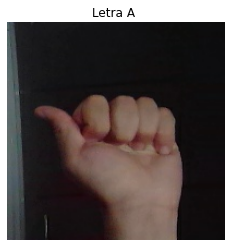

In [77]:
############Imagen de validación#################
example_ts = image_dataset_from_directory(directory='img\\', 
                                                labels=None, ##Etiquetas apartir del directorio.
                                                label_mode=None, ##Modo categorico.
                                                batch_size=20,
                                                image_size=(200, 200), ##Escala a este tamaño las imagenes.
                                                seed = 1,
                                                validation_split = 0.80, ##Porcentaje del tamaño del data set.
                                                subset = "validation")

img = example_ts#.take(1)
for i in img:    
    for j in i:           
        plt.axis("off")
        plt.gca().set_title("Letra A ")                
        plt.imshow(j.numpy().astype("uint8"))
plt.show()    



In [78]:
test_feat  = []
test_label = []
example_ts = Data.Normalization(example_ts)


Imagen Original 13.125 238.4375
Imagen Escalada 0.0 0.6242647


In [79]:
test_feat = Data.generated_vector_nw(example_ts,test_feat)
test_feat = Data.list_to_numpy(test_feat)
print(test_feat.shape)

(321, 200, 200, 3)


In [80]:
clases = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
new_model = keras.models.load_model('Modelo//Modelo_prd.h5')
new_predictions = new_model.predict(test_feat)
#letra = np.argmax(new_predictions)
#print('Modelo 1: Letra indicada por el modelo: ',clases[letra],'Probabilidad',new_predictions[0][letra])

In [81]:
print(new_predictions.shape)

for i in new_predictions:
    print(clases[np.argmax(i)])

(321, 24)
G
G
E
G
E
M
G
C
E
M
C
C
E
E
O
P
C
G
G
G
G
C
O
P
C
C
P
G
F
D
C
E
P
E
D
G
G
O
C
M
E
M
C
O
P
E
P
P
Y
E
C
C
G
E
L
E
G
G
E
C
C
E
P
C
P
G
P
M
G
G
P
P
G
G
P
O
G
P
G
G
C
G
G
G
H
E
M
G
G
C
G
E
C
G
G
G
G
T
C
G
G
C
E
P
P
C
C
D
G
G
P
G
G
S
P
G
G
C
P
G
P
C
E
G
E
M
C
O
E
C
G
P
C
C
E
G
C
P
E
P
O
G
E
C
E
G
E
G
P
G
G
C
E
F
G
G
T
G
G
C
E
G
G
M
F
E
C
C
M
G
F
G
C
E
D
C
G
C
G
G
G
G
G
O
G
G
C
P
C
E
E
E
E
E
G
G
M
M
P
O
P
G
E
C
C
O
G
G
E
P
G
O
G
T
G
G
E
M
G
P
G
F
G
G
C
G
G
G
E
O
P
G
P
C
G
O
G
C
G
G
G
C
G
O
E
P
E
G
E
P
E
P
E
G
G
C
G
G
P
G
C
O
C
P
G
C
C
E
G
M
O
P
C
C
P
E
M
C
E
G
C
G
C
D
C
G
P
P
G
P
G
P
G
E
C
G
C
E
E
P
E
E
C
C
G
G
G
G
E
G
G
C
G
G
C
M
P
C
G
C
G
